# Gradient Descent 
In this notebook, we are going to examine the effectiveness of three popular gradient descent methods, plain vanilla, momentum, and Nesterov's accelerated gradient descent.

 *   Define a function to minimise: 
* The function we chose is Three-Hump Camel function. The Function has a long valley, with its global minimum hit at f*(X1, X2) = 0, where X*(0, 0).
![alt text](https://user-images.githubusercontent.com/52373417/61047080-874fe600-a3d6-11e9-89c0-22f250d78b59.png)

 * Algorithms for gradient descent:
* Plain vanilla gradient descent
* Momentum gradient descent
* Nesterov's accelerated gradient

The algorithm of the gradient descent operates as follows. The convergence criteria is that if the Euclidean norm of the two-dimentional derivatives of loss function is close to zero.

Firstly,
* Choose starting points for X1 and X2
* Find the gradients at the starting point
* If the convergence criteria is met then stop

Otherwise iterate as follows,
* Take small steps in the computed direction
* Find the gradients
* If the convergence criteria is met then stop

If the loss function becomes too large, then stop running the code and print "Exploded" in the output. The tolerance level we set for exploded is sufficiently large. i.e. 10^7.

## Importing necessary libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from gd import gd_2d
from mpl_toolkits import mplot3d  #3D scatter plot
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def fn_loss(x1, x2):
    return 2*x1**2 - 1.05*x1**4 + x1**6/6 + x1*x2 + x2**2
    
def fn_grad1(x1, x2):
    return 4*x1 - 4.2*x1**3 + x1**5 + x2

def fn_grad2(x1, x2):
    return x1 + 2*x2

## 3D scatterplot of the loss function

Text(0.5, 0.92, '3D plot of loss function')

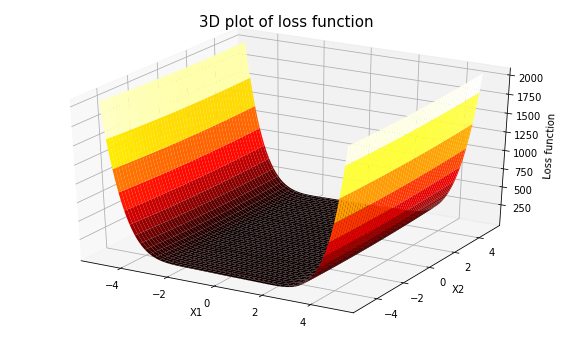

In [4]:
#3D plot of loss function

# Data for a three-dimensional line
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# Data for three-dimensional scattered points
X, Y = np.meshgrid(x, y)
Z = fn_loss(X, Y)

fig = plt.figure(figsize = (10, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap="hot")

#ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Loss function')
ax.set_title('3D plot of loss function', fontsize = 15)

## Plain vanilla gradient descent
Plain vanilla gradient descent is the simplest version of gradient descent, which takes small steps in the direction of the gradient. It updates the parameters as follows.

![alt text](https://user-images.githubusercontent.com/52373417/61049162-ae5ce680-a3db-11e9-99cb-03a29f6f4228.png)

Our experiment set up:
* X1 and X2 starts from 5
* Step size is 0.001
* Number of iterations is 10000

np.random.seed(0) # Fixing random state for reproducibility
solver = gd_2d(fn_loss = fn_loss, fn_grad1 = fn_grad1, fn_grad2 = fn_grad2)
solver.pv(x1_init = 5, x2_init = 5, n_iter = 10000, eta = 0.001, tol = 1e-5, tol_upper = 1e+5)

## Plots of plain vanilla gradient descent
We are going to produce the path of loss function for plain vanilla gradient descent in both 2D and 3D version to obtain a better understanding of how the algorithm works.

### Vanilla Gradient Descent: 3D plot of the path of loss function
As is shown in the plot, vanilla gradient descent takes small steps to reach to the global minima without too many vibrations.

Text(0.5, 0.92, 'Plain vanilla: 3D plot of loss function')

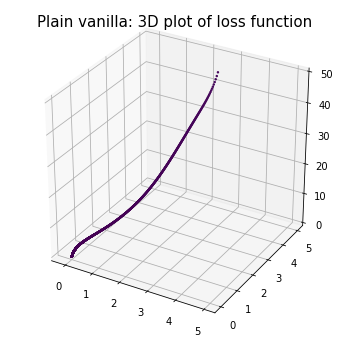

In [7]:
fig = plt.figure(figsize = (6, 6))
ax1 = plt.axes(projection='3d')
ax1.scatter3D(solver.x1_path, solver.x2_path, solver.loss_path, c=solver.loss_path, s=2)
ax1.set_zlim(0,50) 
ax1.set_title("Plain vanilla: 3D plot of loss function", fontsize = 15)

### Vanilla Gradient Descent: 2D plot: the path of loss function against X1

Text(0.5, 1.0, 'Plain vanilla: x1 v.s. loss function')

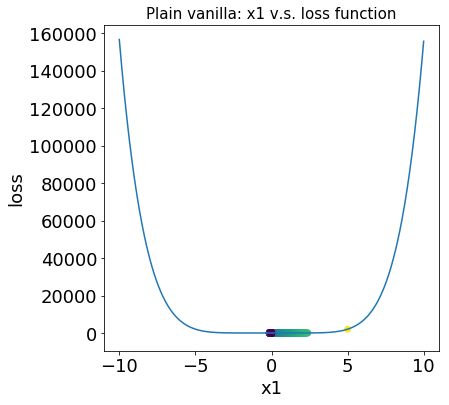

In [9]:
#vanilla gd plot: x1 v.s. loss
x1_range = np.arange(-10, 10, 0.01)
x2_range = np.arange(-10, 10, 0.01)
y_range = fn_loss(x1_range, x2_range)

font = {'size': 18}
matplotlib.rc('font', **font)

cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(solver.loss_path - np.min(solver.loss_path) + 0.01)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))

colours = [cmap(normalize(value)) for value in lst_loss_log]

fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x1_range, y_range)
ax1.scatter(solver.x1_path, solver.loss_path, color=colours)
ax1.set_xlabel('x1')
ax1.set_ylabel('loss')
ax1.set_title("Plain vanilla: x1 v.s. loss function",fontsize = 15)

## Momentum gradient descent
Momentum gradient descent: it takes the past gradients into account to smooth the step size and then update the parameters. Momentum works more efficient than vanilla gradient descent. This is achieved by adding a small part of the previous gradients to update the current one. 

![alt text](https://user-images.githubusercontent.com/52373417/61049302-f976f980-a3db-11e9-8453-6eba2565821a.png)

Our experiment set up:
* X1 and X2 starts from 5
* Step size is 0.001
* Number of iterations is 1000

In [10]:
#momentum gradient descent
solver.momentum(x1_init = 5, x2_init = 5, n_iter = 1000, eta = 0.001, tol = 1e-5, tol_upper = 1e+5, alpha = 0.9)

Converged in 688 steps.  Loss fn 3.0974044061639585e-11 achieved by x1 = -2.391835263855995e-06 x2 = 5.774401134702695e-06


## Plots of momentum gradient descent
We produce the smae plots as in vanilla gradient descent, the 3D plot of the path of loss function against both variables, and the 2D plot of the loss function against X1 only.

### Momentum Gradient Descent: 3D plot of the path of loss function
As is shown in the plot, although it takes fewer steps to reach the global minima, momentum gradient descent has much more vibrations at the start.

Text(0.5, 0.92, 'Momentum: 3D plot of loss function')

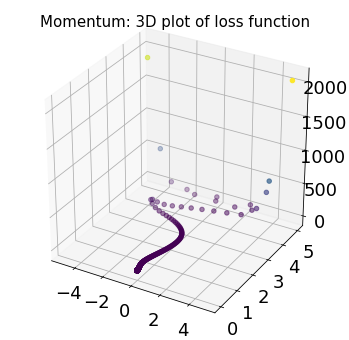

In [11]:
#3D plot
fig = plt.figure(figsize = (6, 6))
ax1 = plt.axes(projection='3d')
ax1.scatter3D(solver.x1_path, solver.x2_path, solver.loss_path, c=solver.loss_path)
ax1.set_title("Momentum: 3D plot of loss function", fontsize = 15)

### Momentum Gradient Descent: 2D plot of the path of loss function against X1
It is clearer in this plot that the path of X1 vibrates a lot around zero before it reaches global minimum.

Text(0.5, 1.0, 'Momentum: x1 v.s. loss function')

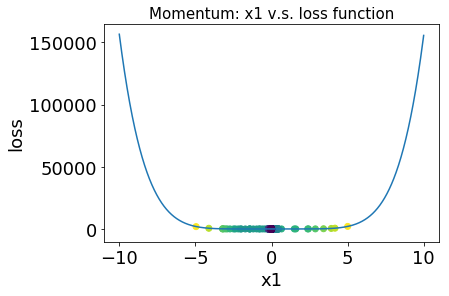

In [12]:
#momentum gd plot: x1 v.s. loss fn
x1_range = np.arange(-10, 10, 0.01)
x2_range = np.arange(-10, 10, 0.01)
y_range = fn_loss(x1_range, x2_range)

font = {'size': 18}
matplotlib.rc('font', **font)

cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(solver.loss_path - np.min(solver.loss_path) + 0.01)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))

colours = [cmap(normalize(value)) for value in lst_loss_log]

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x1_range, y_range)
ax1.scatter(solver.x1_path, solver.loss_path, color=colours)
ax1.set_xlabel('x1')
ax1.set_ylabel('loss')
ax1.set_title("Momentum: x1 v.s. loss function", fontsize = 15)

## Nesterov accelerated gradient
Nesterov's accelerated gradient: this is another modification we made to vanilla gradient descent. Like when person is going downhill, rather than blindly following the slope, Nesterov' accelerated gradient allows the person to has an idea in advance where it is going to effectively avoid going slope up.

It computes the updates to parameters as follows.

![alt text](https://user-images.githubusercontent.com/52373417/61049366-29260180-a3dc-11e9-83ad-12c7ef1a2fca.png)
* X1 and X2 starts from 5
* Step size is 0.001
* Number of iterations is 10000

In [13]:
#nesterov accelerated gradient
solver.nag(x1_init = 5, x2_init = 5, n_iter = 10000, eta = 0.001, tol = 1e-5, tol_upper = 1e+5, alpha = 0.9)

Converged in 679 steps.  Loss fn 0.29863844226343095 achieved by x1 = 1.7475518326534485 x2 = -0.8737709125326627


## Plots of Nesterov accelerated gradient
We are going to produce the path of loss function for Nesterov's accelerated gradient descent in both 2D and 3D version to obtain a better understanding of whether the algorithm improves.

### Momentum Gradient Descent: 3D plot of the path of loss function
As is shown in the plot, Nesterov' accelerated gradient has much fewer vibrations than momentum gradient descent. Also, it takes the least steps to reach the global minima under the same condition amoung the three algorithms in our experiment.

Text(0.5, 0.92, 'Nesterov: 3D plot of loss function')

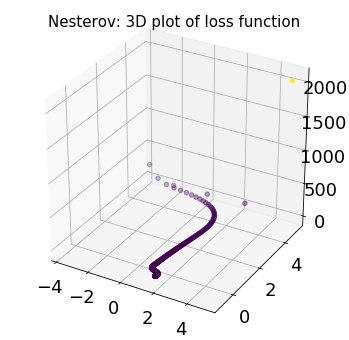

In [14]:
fig = plt.figure(figsize = (6, 6))
ax1 = plt.axes(projection='3d')
ax1.scatter3D(solver.x1_path, solver.x2_path, solver.loss_path, c=solver.loss_path)
ax1.set_title("Nesterov: 3D plot of loss function", fontsize = 15)

### Momentum Gradient Descent: 2D plot of the path of loss function against X1
It shows clearer in the 2D plot that Nesterov's accelerated gradient has much fewer vibrations than momentum gradient descent before reaching the global minima.

Text(0.5, 1.0, 'Nesterov: x1 v.s. loss function')

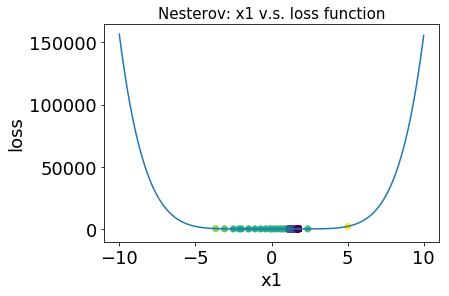

In [15]:
#nesterov gd plot: x1 v.s. loss fn
x1_range = np.arange(-10, 10, 0.01)
x2_range = np.arange(-10, 10, 0.01)
y_range = fn_loss(x1_range, x2_range)

font = {'size': 18}
matplotlib.rc('font', **font)

cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(solver.loss_path - np.min(solver.loss_path) + 0.01)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))

colours = [cmap(normalize(value)) for value in lst_loss_log]

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x1_range, y_range)
ax1.scatter(solver.x1_path, solver.loss_path, color=colours)
ax1.set_xlabel('x1')
ax1.set_ylabel('loss')
ax1.set_title("Nesterov: x1 v.s. loss function", fontsize = 15)